In [1]:
import praw
import pandas as pd
from datetime import datetime
# Reddit API credentials
client_id = "C4EhyNudMZMvxwrmp5i6fg"
client_secret = "278co_gHUAg07-IPHFXhlGy3SOmYqg"
username = "projectcapx"
password = "capx1234"
user_agent = "MyRedditScraper/1.0 by projectcapx"  

# Create a Reddit instance
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     username=username,
                     password=password,
                     user_agent=user_agent)

# Define the subreddit and keywords

num_posts = 1000 
keyword = "TSLA"  

# Scrape posts
posts_data = []
subreddit = reddit.subreddit('all')
start_date = datetime(2023, 5, 1)  # Start date (YYYY, M, D)
end_date = datetime(2024, 10, 21)

for submission in reddit.subreddit('all').search(keyword, sort='hot', limit=num_posts):
    created_utc = datetime.utcfromtimestamp(submission.created_utc)  # Convert to datetime

    # Check if the post is within the specified date range
    if start_date <= created_utc <= end_date:
        if keyword.lower() in submission.title.lower() or keyword.lower() in submission.selftext.lower():
            posts_data.append({
                'title': submission.title,
                'selftext': submission.selftext,
                'score': submission.score,
                'author': submission.author,
                'created': submission.created_utc
            })
            print(f"Fetched post: {submission.title}")  # Debugging output

if not posts_data:
    print("No posts found matching the keyword.")

# Convert to DataFrame
posts_df = pd.DataFrame(posts_data)



Fetched post: $TSLA Super Chill Weekend Thread September 28-29, 2024
Fetched post: Video specifically mentioning this subreddit and comparing to NVDA and TSLA
Fetched post: $TSLA Daily Thread - September 27, 2024
Fetched post: 14k $TSLA GAINSSSZ swinging some $270c for next week LFGGG !!
Fetched post: Selling puts on TSLA for Oct 10 Robo Taxi? 
Fetched post: $TSLA --
Fetched post: $TSLA Daily Thread - September 26, 2024
Fetched post: $TSLA
Fetched post: If you know you know $TSLA
Fetched post: BRITISH COLUMBIA INVESTMENT MANAGEMENT Corp buys 206,000 TSLA shares, now owns 755,000 shares
Fetched post: $TSLA Daily Thread - September 25, 2024
Fetched post: Most shorted stocks by volume yesterday: $DUO $NVDA $HOLD $NIO $SQQQ $SOXL $CNEY $MU $FXI $SOXS $TSLA
Fetched post: TSLA is coming into a key resistance area with that purple box ahead, but order flow and positioning both very bullish until then. 
Fetched post: TSLA breaking out on the monthly chart. Might be able to see 350+ with the ro

In [2]:
link="https://docs.google.com/spreadsheets/d/1z-0XThtWIQpQbSgmKpeAEX4umHRfv_x7xmB6DsZaT-c/pub?gid=0&single=true&output=csv"
tsla_data=pd.read_csv(link)

f_combined = pd.concat([posts_df, tsla_data], axis=0)

# Save to CSV for later analysis
f_combined.to_csv('reddit_posts.csv', index=False)

In [3]:
print(f_combined.head())  
print(f_combined.info()) 


                                               title  \
0  $TSLA Super Chill Weekend Thread September 28-...   
1  Video specifically mentioning this subreddit a...   
2            $TSLA Daily Thread - September 27, 2024   
3  14k $TSLA GAINSSSZ swinging some $270c for nex...   
4        Selling puts on TSLA for Oct 10 Robo Taxi?    

                                            selftext  score  \
0  No comments constitute financial or investment...     17   
1  [https://www.youtube.com/watch?v=NZXQAz13OxU](...     16   
2  Fun chat. No comments constitute financial or ...     19   
3            Went crazy on $TSLA after FOMC meeting      12   
4  Is anyone selling puts on TSLA for Oct 10's Ro...      2   

                author       created subreddit.name  
0        AutoModerator  1.727468e+09            NaN  
1        bluewaterfree  1.727492e+09            NaN  
2        AutoModerator  1.727402e+09            NaN  
3  Fancy-Platypus-3352  1.727481e+09            NaN  
4      Soft_Vi

In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords


f_combined = pd.read_csv('reddit_posts.csv')


nltk.download('stopwords')

# Preprocessing function
def preprocess_text(text):
    if isinstance(text, str):  # Check if the input is a string
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
        text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
        return text
    return ""  # Return empty string if not a string


f_combined['cleaned_text'] = f_combined['title'].fillna('') + ' ' + f_combined['selftext'].fillna('')
f_combined['cleaned_text'] = f_combined['cleaned_text'].apply(preprocess_text)

# Save cleaned data
f_combined.to_csv('cleaned_reddit_posts.csv', index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
f_combined

,title,selftext,score,author,created,subreddit.name,cleaned_text
0,$TSLA Super Chill Weekend Thread September 28-...,No comments constitute financial or investment...,17,AutoModerator,1.727468e+09,NaN,"$tsla super chill weekend thread september -, ..."
1,Video specifically mentioning this subreddit a...,[https://www.youtube.com/watch?v=NZXQAz13OxU](...,16,bluewaterfree,1.727492e+09,NaN,video specifically mentioning this subreddit a...
2,"$TSLA Daily Thread - September 27, 2024",Fun chat. No comments constitute financial or ...,19,AutoModerator,1.727402e+09,NaN,"$tsla daily thread - september , fun chat. no ..."
3,14k $TSLA GAINSSSZ swinging some $270c for nex...,Went crazy on $TSLA after FOMC meeting,12,Fancy-Platypus-3352,1.727481e+09,NaN,k $tsla gainsssz swinging some $c for next wee...
4,Selling puts on TSLA for Oct 10 Robo Taxi?,Is anyone selling puts on TSLA for Oct 10's Ro...,2,Soft_Video_9128,1.727461e+09,NaN,selling puts on tsla for oct robo taxi? is any...
...,...,...,...,...,...,...,...
11039,TSLA Terathread - For the week of Jul 05,"We laugh at your ""giga"". \n \n For TSLA talk, ...",24,NaN,1.625486e+09,realtesla,tsla terathread - for the week of jul we laugh...
11040,"$TSLA Daily Thread - July 05, 2021",MðŸŒ•ðŸŒ•NDAY\n \n :)\n \n ðŸš€ ðŸš€ ðŸš€ ðŸš€...,32,NaN,1.625465e+09,tslalounge,"$tsla daily thread - july , mðÿœ•ðÿœ•nday :) ð..."
11041,"$TSLA Daily Investor Discussion - July 05, 2021",# This is the daily fun thread/chat. ðŸ¥³ðŸš€\...,14,NaN,1.625461e+09,teslainvestorsclub,"$tsla daily investor discussion - july , this ..."
11042,Let's revive the buried WSB culture! GME to TH...,[deleted],1,NaN,1.625450e+09,u_near_he,let's revive the buried wsb culture! gme to th...


In [6]:
from textblob import TextBlob

# Sentiment analysis function
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return "Neutral"

# Apply sentiment analysis
f_combined['sentiment'] = f_combined['cleaned_text'].apply(get_sentiment)

# Save final results
f_combined.to_csv('final_reddit_posts_with_sentiment.csv', index=False)


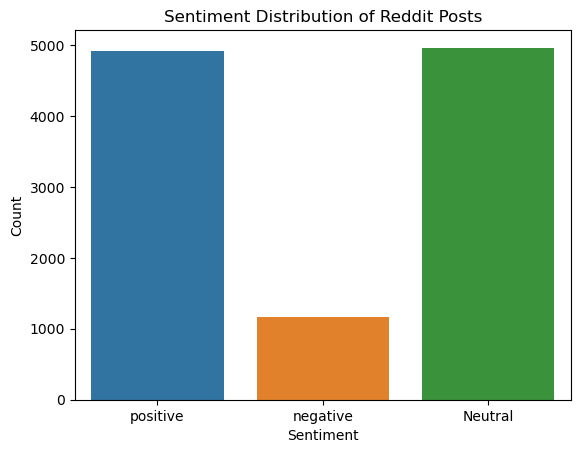

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
sns.countplot(data=f_combined, x='sentiment')
plt.title('Sentiment Distribution of Reddit Posts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [8]:
k=pd.to_datetime(f_combined['created'], unit='s').dt.date
k.to_csv('date_sheet.csv')

In [9]:
import yfinance as yf

# Download historical stock price data
stock_symbol = keyword
stock_data = yf.download(stock_symbol, start="2021-07-05", end="2024-10-21", interval="1d")
stock_data.reset_index(inplace=True)


[*********************100%***********************]  1 of 1 completed


In [10]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-06,227.236664,228.000000,217.133331,219.860001,219.860001,69853500
1,2021-07-07,221.423340,221.899994,212.773331,214.883331,214.883331,56376000
2,2021-07-08,209.456665,218.143326,206.820007,217.603333,217.603333,68319900
3,2021-07-09,217.726669,219.636673,214.896667,218.983337,218.983337,54421500
4,2021-07-12,220.733337,229.080002,220.720001,228.566666,228.566666,77781000
...,...,...,...,...,...,...,...
809,2024-09-23,242.610001,250.000000,241.919998,250.000000,250.000000,86927200
810,2024-09-24,254.080002,257.190002,249.050003,254.270004,254.270004,88491000
811,2024-09-25,252.539993,257.049988,252.279999,257.019989,257.019989,65034300
812,2024-09-26,260.600006,261.750000,251.529999,254.220001,254.220001,67142200


In [11]:
# Convert timestamp to date
f_combined['date'] = pd.to_datetime(f_combined['created'], unit='s').dt.date


# Ensuring 'Date' column in stock_data is of datetime type
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Group by date and get daily sentiment (average or majority)
daily_sentiment = f_combined.groupby('date')['sentiment'].agg(lambda x: x.mode()[0]).reset_index()
# Convert 'date' column in daily_sentiment to datetime
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])
# Merge with stock data

merged_data = pd.merge(stock_data, daily_sentiment, left_on='Date', right_on='date', how='left')



In [12]:
merged_data

,Date,Open,High,Low,Close,Adj Close,Volume,date,sentiment
0,2021-07-06,227.236664,228.000000,217.133331,219.860001,219.860001,69853500,2021-07-06,positive
1,2021-07-07,221.423340,221.899994,212.773331,214.883331,214.883331,56376000,2021-07-07,positive
2,2021-07-08,209.456665,218.143326,206.820007,217.603333,217.603333,68319900,2021-07-08,positive
3,2021-07-09,217.726669,219.636673,214.896667,218.983337,218.983337,54421500,2021-07-09,positive
4,2021-07-12,220.733337,229.080002,220.720001,228.566666,228.566666,77781000,2021-07-12,Neutral
...,...,...,...,...,...,...,...,...,...
809,2024-09-23,242.610001,250.000000,241.919998,250.000000,250.000000,86927200,2024-09-23,positive
810,2024-09-24,254.080002,257.190002,249.050003,254.270004,254.270004,88491000,2024-09-24,positive
811,2024-09-25,252.539993,257.049988,252.279999,257.019989,257.019989,65034300,2024-09-25,positive
812,2024-09-26,260.600006,261.750000,251.529999,254.220001,254.220001,67142200,2024-09-26,positive


In [13]:
x=merged_data[['sentiment']].dropna
x

<bound method DataFrame.dropna of     sentiment
0    positive
1    positive
2    positive
3    positive
4     Neutral
..        ...
809  positive
810  positive
811  positive
812  positive
813  positive

[814 rows x 1 columns]>

In [14]:
# Create a target variable based on stock movement
merged_data['Price_Change'] = merged_data['Close'].diff().fillna(0)
merged_data['Target'] = (merged_data['Price_Change'] > 0).astype(int)  # 1 if price went up, 0 if down

# Map sentiment to numerical values
sentiment_map = {'positive': 1, 'negative': 0}
merged_data['Sentiment_Score'] = merged_data['sentiment'].map(sentiment_map)


In [15]:
merged_data

,Date,Open,High,Low,Close,Adj Close,Volume,date,sentiment,Price_Change,Target,Sentiment_Score
0,2021-07-06,227.236664,228.000000,217.133331,219.860001,219.860001,69853500,2021-07-06,positive,0.000000,0,1.0
1,2021-07-07,221.423340,221.899994,212.773331,214.883331,214.883331,56376000,2021-07-07,positive,-4.976669,0,1.0
2,2021-07-08,209.456665,218.143326,206.820007,217.603333,217.603333,68319900,2021-07-08,positive,2.720001,1,1.0
3,2021-07-09,217.726669,219.636673,214.896667,218.983337,218.983337,54421500,2021-07-09,positive,1.380005,1,1.0
4,2021-07-12,220.733337,229.080002,220.720001,228.566666,228.566666,77781000,2021-07-12,Neutral,9.583328,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
809,2024-09-23,242.610001,250.000000,241.919998,250.000000,250.000000,86927200,2024-09-23,positive,11.750000,1,1.0
810,2024-09-24,254.080002,257.190002,249.050003,254.270004,254.270004,88491000,2024-09-24,positive,4.270004,1,1.0
811,2024-09-25,252.539993,257.049988,252.279999,257.019989,257.019989,65034300,2024-09-25,positive,2.749985,1,1.0
812,2024-09-26,260.600006,261.750000,251.529999,254.220001,254.220001,67142200,2024-09-26,positive,-2.799988,0,1.0


In [16]:
# Prepare model data and drop NaN values
model_data = merged_data[['Sentiment_Score', 'Target']].dropna()

# Define features and target
X = model_data[['Sentiment_Score']]
y = model_data[['Target']]

In [17]:
X

,Sentiment_Score
0,1.0
1,1.0
2,1.0
3,1.0
6,1.0
...,...
809,1.0
810,1.0
811,1.0
812,1.0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score



# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)  # Fit the model with training data

# Make predictions
y_pred = model.predict(X_test)




C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
X

,Sentiment_Score
0,1.0
1,1.0
2,1.0
3,1.0
6,1.0
...,...
809,1.0
810,1.0
811,1.0
812,1.0


In [20]:
# Evaluate the model
print(classification_report(X_train, y_train))
print("Accuracy:", accuracy_score(X_train, y_train))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.98      0.56      0.72       108

    accuracy                           0.56       109
   macro avg       0.49      0.28      0.36       109
weighted avg       0.97      0.56      0.71       109

Accuracy: 0.5596330275229358


In [21]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.57      1.00      0.73        16

    accuracy                           0.57        28
   macro avg       0.29      0.50      0.36        28
weighted avg       0.33      0.57      0.42        28

Accuracy: 0.5714285714285714


C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
